In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###### Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### Reading text based Dataset into pandas DataFrame

In [82]:
sms_df=pd.read_csv('spam.csv',encoding='latin-1')

In [83]:
sms_df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [84]:
sms_df.shape

(5572, 2)

The datafraem has 5572 Rows and 5 columns, we can check the total Null values in dataframe which is shown below

In [85]:
sms_df.isnull().sum()

text      0
target    0
dtype: int64

Except Column v1 and v2 all columns have large NaN values

In [86]:
sms_df.isnull().mean()*100

text      0.0
target    0.0
dtype: float64

Most of unnamed columns have huge value of NaN it's best we drop all the unnamed columns

In [87]:
sms_df.dropna(how='any',axis=1,inplace=True)

In [88]:
sms_df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [89]:
sms_df.columns=['Message','Tag']

spam ='Message which is labelled as Spam'

ham = 'Message which is labelled as Not Spam'

In [90]:
sms_df.describe()

,Message,Tag
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


Count= Total Count of Tag and Message is 5572.

Unique=In Tag Column there are 2 unique characters and in Message 5169 meesages are unique

Top= Tag Column as ham category as the majority class and in Message column **Sorry, I'll call later** is the Top message

Freq= Ham has occured 4825 times and **Sorry, I'll call later** has occured 30 times 

In [91]:
sms_df.groupby('Tag').describe()

Message                                                               
       count unique                                                top freq
Tag                                                                        
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

Dataset is imbalanced As the number of ham count is higher than spam count, in such case when the dataset is applied to Machine Learning the Algorithm becomes highly biased

We have to consider the label which has less count here[ham] and extract the other label[spam] with the exact count so that the Data becomes Balanced.

Imbalanced dataset can be checked whether it is balanced or not with the help of DummyClassifier we can check with the dataset later

In [92]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Message    5572 non-null object
Tag        5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


Since Tag column is Categorical we can convert it into numerical where:

spam=1

ham=0

In [93]:
sms_df['Tag'].unique()

array(['ham', 'spam'], dtype=object)

In [94]:
sms_df['Tag']=np.where(sms_df['Tag']=='spam',1,0)

In [95]:
sms_df.head()

,Message,Tag
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [96]:
sms_df.describe()

,Tag
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


What percentage of Data are Spam?


In [97]:
sms_df['Tag'].mean()*100

13.406317300789663

Before modifing the Message column let's apply MultinomialNB classifier after Counter and TFid Vectorization  and check Accuracy score.

During Text processing,cleaning the text[preprocessing] is necessary, the cleaned text have to be converted into numerical format where each word is represented by a matrix. Which is also known as word embedding.

TFIDF[Term frequency Inverse document frequency]  allows us to weight terms based on how important they are to a document.

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [99]:
X_train,X_test,y_train,y_test=train_test_split(sms_df['Message'],sms_df['Tag'],random_state=0)

In [100]:
# CountVectorizer
count=CountVectorizer().fit(X_train)
X_train_Count=count.transform(X_train)
X_test_count=count.transform(X_test)

#TfidfVectorizer

Tfid=TfidfVectorizer().fit(X_train)
X_train_Tfid=Tfid.transform(X_train)
X_test_Tfid=Tfid.transform(X_test)

min_df[x]: The minimum number of times the term variable should appear in the document i.e the term variable wil be deleted which appears less than x times

ngram_range[min,max]: the grouping is done from min upto max times

In [101]:
clf_Tfid=MultinomialNB(alpha=0.1)
clf_Tfid.fit(X_train_Tfid,y_train)
pred=clf_Tfid.predict(X_test_Tfid)
print('ROC score by applying TfidfVectorizer:',roc_auc_score(y_test,pred))

ROC score by applying TfidfVectorizer: 0.94923857868


In [102]:
feature_names=np.array(count.get_feature_names())
count_coefficients=clf_count.coef_[0].argsort()

print('Smallest 20  Count vectorizer coefficients:\n')
print(feature_names[count_coefficients[:20]])
print('\n\n')
print('Largest 20  Count vectorizer coefficients:\n')
print(feature_names[count_coefficients[-21:-1]])

Smallest 20  Count vectorizer coefficients:

['000' '00']



Largest 20  Count vectorizer coefficients:

['000']


In [103]:
feature_names=np.array(Tfid.get_feature_names())
Tfid_coefficients=clf_Tfid.coef_[0].argsort()

print('Smallest 20  Tfid vectorizer coefficients:\n')
print(feature_names[Tfid_coefficients[:20]])
print('\n\n')
print('Largest 20  Tfid vectorizer coefficients:\n')
print(feature_names[Tfid_coefficients[-21:-1]])

Smallest 20  Tfid vectorizer coefficients:

['justfound' 'hostel' 'host' 'hospitals' 'hospital' 'hos' 'horse'
 'horrible' 'screwd' 'scrounge' 'sculpture' 'hor' 'hoping' 'hopes'
 'hopefully' 'hopeful' 'screen' 'hoped' 'screaming' 'scream']



Largest 20  Tfid vectorizer coefficients:

['have' 'prize' 'reply' 'www' 'is' 'the' 'from' 'ur' 'claim' 'text'
 'mobile' 'stop' 'for' 'now' 'or' 'you' 'txt' 'your' 'free' 'call']


In [104]:
from sklearn.dummy import DummyClassifier

dummy=DummyClassifier(strategy='prior').fit(X_train_Count,y_train)

In [105]:
dummy_predict=dummy.predict(X_test_count)
roc_auc_score(y_test,dummy_predict)

0.5

By checking with the DummyClassifier we can see that the Classifier is performing Good with Provided dataset no modification needs to de done to Dataset. Let's continue Feature Engineering with the same Dataset.

In [106]:
X_train_Count.shape

(4179, 7359)

In [107]:
sum1=X_train_Count.sum(axis=0)

In [108]:
len(count.get_feature_names())

7359

In [109]:
sum1.shape

(1, 7359)

We can get the largest and smallest countvectorizer and Tfid features,  

In [110]:
# Countvectorizer Features

data=[]

for col,features in enumerate(count.get_feature_names()):
    data.append([features,sum1[0,col]])
    
feature_data=pd.DataFrame(data,columns=['Feature','Score'])
feature_data.sort_values(by='Score',inplace=True)

print('20 features with lowest score')

print(feature_data.head(20).sort_values(by='Score',ascending=False))

print('20 features with highest score')
print(feature_data.tail(20).sort_values(by='Score',ascending=False))

20 features with lowest score
              Feature  Score
3679        justfound      1
4184        meatballs      1
4188         medicine      1
4144  masteriastering      1
4185          mecause      1
4146              mat      1
4148          matched      1
4152             math      1
4153      mathematics      1
4154          mathews      1
4157          matters      1
4158          matthew      1
4161              max      1
4163             max6      1
4165          maximum      1
4166             maxã      1
4173            mcfly      1
4176            meals      1
4179      meaningless      1
4194            meets      1
20 features with highest score
     Feature  Score
6576      to   1670
7322     you   1660
6461     the    977
897      and    716
3452      in    707
3555      is    666
4174      me    580
4418      my    568
3566      it    558
2788     for    517
7327    your    482
4633      of    458
1522    call    452
3184    have    432
6455    that    424
4674      

In [111]:
#Tfidf

data1=[]

Tf_sum=X_train_Tfid.sum(axis=0)

for col,features in enumerate(Tfid.get_feature_names()):
    data1.append([features,Tf_sum[0,col]])
    
feature_data=pd.DataFrame(data1,columns=['Feature','Score'])
feature_data.sort_values(by='Score',inplace=True)

print('20 features with lowest score')
print('\n')

print(feature_data.head(20).sort_values(by='Score',ascending=False))
print('\n\n')
print('20 features with highest score')
print('\n')
print(feature_data.tail(20).sort_values(by='Score',ascending=False))

20 features with lowest score


           Feature     Score
6756         ugadi  0.091259
1700     childrens  0.091259
3203        healer  0.074474
5195       pudunga  0.074474
6319   sympathetic  0.074474
2592  exterminator  0.074474
1047      athletic  0.074474
4726     organizer  0.074474
4898          pest  0.074474
6892        venaam  0.074474
690         aaniye  0.074474
2175    determined  0.074474
1951    courageous  0.074474
2153    dependable  0.074474
1836     companion  0.074474
6211       stylist  0.074474
1679          chef  0.074474
5187  psychiatrist  0.074474
5189  psychologist  0.074474
3929      listener  0.074474



20 features with highest score


     Feature       Score
7322     you  185.772688
6576      to  154.881389
6461     the  109.918312
3452      in   96.014227
4174      me   87.589014
897      and   83.875364
3555      is   83.644980
4418      my   78.358587
3566      it   78.047917
1522    call   74.945438
4657      ok   71.155421
2788     for   69.81547

# Feature Engineering

Making use of stopwords to the Message column to delete all the stopwords,and also checking the length of message length before and after applying **stopwords**

In [112]:
sms_df['Message_length']=sms_df['Message'].apply(lambda x:len(x))
sms_df.head()

,Message,Tag,Message_length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [113]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sentence='This is an example showing of stop word filteration.'
words=word_tokenize(example_sentence)
print('Before applying Stopwords:\n\n{}'.format(words))
stop_words=set(stopwords.words('english'))

w=[]
for i in words:
    if i not in stop_words:
        w.append(i)
print('\n\n')
print('After applying Stopwords:\n\n{}'.format(w))

Before applying Stopwords:

['This', 'is', 'an', 'example', 'showing', 'of', 'stop', 'word', 'filteration', '.']



After applying Stopwords:

['This', 'example', 'showing', 'stop', 'word', 'filteration', '.']


In [114]:
sms_df['Message_stop']=sms_df['Message'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words ]))

In [115]:
sms_df['Message_length_stop']=sms_df['Message_stop'].apply(lambda x:len(x))
sms_df.head()

,Message,Tag,Message_length,Message_stop,Message_length_stop
0,"Go until jurong point, crazy.. Available only ...",0,111,"Go jurong point, crazy.. Available bugis n gre...",91
1,Ok lar... Joking wif u oni...,0,29,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...,141
3,U dun say so early hor... U c already then say...,0,49,U dun say early hor... U c already say...,41
4,"Nah I don't think he goes to usf, he lives aro...",0,61,"Nah I think goes usf, lives around though",41


Deleting Message and Message_length column

In [116]:
sms_df.drop(['Message','Message_length'],axis=1,inplace=True)

In [117]:
sms_df.head()

,Tag,Message_stop,Message_length_stop
0,0,"Go jurong point, crazy.. Available bugis n gre...",91
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,141
3,0,U dun say early hor... U c already say...,41
4,0,"Nah I think goes usf, lives around though",41


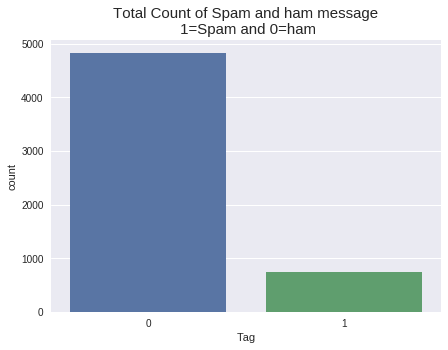

In [118]:
plt.figure(figsize=(7,5))
sns.countplot(x='Tag',data=sms_df)
plt.title('Total Count of Spam and ham message\n 1=Spam and 0=ham',size=15)

We can also check the total number of digits in Message_stop column and add it as an extra feature

In [119]:
sms_df['Number_count']=sms_df['Message_stop'].apply(lambda x:len(''.join([n for n in x if n.isdigit()])))

In [120]:
sms_df.head(6)

,Tag,Message_stop,Message_length_stop,Number_count
0,0,"Go jurong point, crazy.. Available bugis n gre...",91,0
1,0,Ok lar... Joking wif u oni...,29,0
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,141,25
3,0,U dun say early hor... U c already say...,41,0
4,0,"Nah I think goes usf, lives around though",41,0
5,1,FreeMsg Hey darling 3 week's word back! I'd li...,98,4


In [121]:
sms_df['Message_stop'][5] # 6th message contains exactly 4 digits

"FreeMsg Hey darling 3 week's word back! I'd like fun still? Tb ok! XxX std chgs send, Ã¥Â£1.50 rcv"

In [122]:
sms_df[sms_df['Tag']==1].describe()

,Tag,Message_length_stop,Number_count
count,747.0,747.000000,747.000000
mean,1.0,119.854083,15.759036
std,0.0,28.257602,8.755896
min,1.0,13.000000,0.000000
25%,1.0,108.000000,10.000000
50%,1.0,125.000000,16.000000
75%,1.0,139.000000,22.000000
max,1.0,173.000000,47.000000


In [123]:
sms_df[sms_df['Tag']==0].describe()

,Tag,Message_length_stop,Number_count
count,4825.0,4825.000000,4825.000000
mean,0.0,54.226114,0.299275
std,0.0,44.307890,1.063086
min,0.0,2.000000,0.000000
25%,0.0,25.000000,0.000000
50%,0.0,40.000000,0.000000
75%,0.0,70.000000,0.000000
max,0.0,566.000000,23.000000


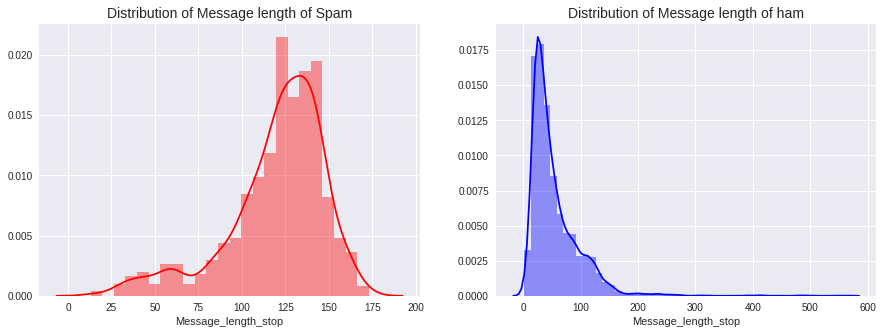

In [124]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

msg_length_spam=sms_df.loc[sms_df['Tag']==1,'Message_length_stop']
msg_length_ham=sms_df.loc[sms_df['Tag']==0,'Message_length_stop']

sns.distplot(msg_length_spam,ax=ax[0],color='r')
ax[0].set_title('Distribution of Message length of Spam',fontsize=14)


sns.distplot(msg_length_ham,ax=ax[1],color='b')
ax[1].set_title('Distribution of Message length of ham',fontsize=14)
plt.show()

Length of messages for Spam is higher than the Ham message which means that the Spam Message has higher number of characters.

Similarly we can also plot for number_count to check whether the Spam message has high number count.

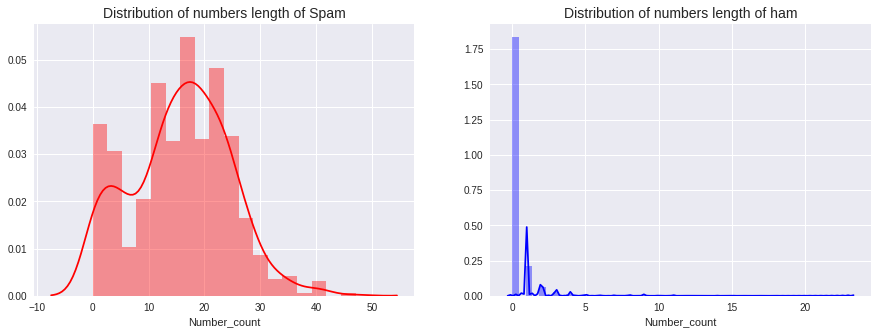

In [125]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

number_count_spam=sms_df.loc[sms_df['Tag']==1,'Number_count']
number_count_ham=sms_df.loc[sms_df['Tag']==0,'Number_count']

sns.distplot(number_count_spam,ax=ax[0],color='r')
ax[0].set_title('Distribution of numbers length of Spam',fontsize=14)



# try:
#     sns.distplot(number_count_ham,ax=ax[1],color='b')
# except RuntimeError as re:
#     if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
#         sns.distplot(number_count_ham,ax=ax[1],color='b', kde_kws={'bw': 0.1})
#         ax[1].set_title('Distribution of numbers length of ham',fontsize=14)
#     else:
#         raise re

sns.distplot(number_count_ham,ax=ax[1],color='b', kde_kws={'bw': 0.1})
ax[1].set_title('Distribution of numbers length of ham',fontsize=14)
plt.show()

we can see that there are high Count of Numbers in the Spam message than Non spam message. Which means that the spam message are also related to money where it says as winning a lottery or some value of amount will be credited etc.

# Evaluate model again with new features and check the accuracy score

In [126]:
X=sms_df['Message_stop']
y=sms_df['Tag']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [127]:
# # CountVectorizer
count=CountVectorizer(min_df=5,ngram_range=[3,6],analyzer='char').fit(X_train)
X_train_Count=count.transform(X_train)
X_test_Count=count.transform(X_test)

#TfidfVectorizer

Tfid=TfidfVectorizer(min_df=5,ngram_range=[3,6],analyzer='char').fit(X_train)
X_train_Tfid=Tfid.transform(X_train)
X_test_Tfid=Tfid.transform(X_test)

In [128]:
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train_Count,y_train)
train_pred=clf.predict(X_train_Count)
print('ROC score of Training by applying Countvectorizer:',roc_auc_score(train_pred,y_train))
pred_count=clf.predict(X_test_Count)
print('ROC score of Testing by applying Countvectorizer:',roc_auc_score(y_test,pred_count))

ROC score of Training by applying Countvectorizer: 0.975756965575
ROC score of Testing by applying Countvectorizer: 0.974678709064


In [129]:
# Predictions of MultinomialNB using CountVectorization

x=['do you have plans for weekend?, let us meet at our usual place',
  'Hii, you are our lucky customer, you have won 100000000 Rs, Please provide your account details we will transfer the amount',
  'Your account is freezed please provide your account details to unfreeze the account',
  'Hi, Pooja you have been selected for the First round of interview with Wipro, you need to visit our campus on Next Monday']
data=pd.Series(x)
trans=count.transform(data)
clf.predict(trans)

array([0, 1, 1, 0])

In [130]:
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train_Tfid,y_train)
train_pred=clf.predict(X_train_Tfid)
print('ROC score of Training by applying TFidVectorizer:',roc_auc_score(train_pred,y_train))
pred_tfid=clf.predict(X_test_Tfid)
print('ROC score of Testing by applying TFidVectorizer:',roc_auc_score(y_test,pred_tfid))

ROC score of Training by applying TFidVectorizer: 0.986337514967
ROC score of Testing by applying TFidVectorizer: 0.973812878801


In [131]:
# Predictions of MultinomialNB using TfidVectorization

x=['do you have plans for weekend?, let us meet at our usual place',
  'Hii, you are our lucky customer, you have won 100000000 Rs, Please provide your account details we will transfer the amount',
  'Your account is freezed please provide your account details to unfreeze the account',
  'Hi, Pooja you have been selected for the First round of interview with Wipro, you need to visit our campus on Next Monday for interview process']
data=pd.Series(x)
trans=Tfid.transform(data)
clf.predict(trans)

array([0, 1, 1, 0])

We can apply Confusion matrix and check the Performance of a Classifier

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [133]:
print('confusion matrix ')
conf_count=confusion_matrix(y_test,pred_count)
print('Confusion matrix for classifier using Countvectorizer:\n\n{}'.format(conf_count))
conf_tfid=confusion_matrix(y_test,pred_tfid)
print('Confusion matrix for classifier using TFidVectorizer:\n\n{}'.format(conf_tfid))

confusion matrix 
Confusion matrix for classifier using Countvectorizer:

[[1184   12]
 [   8  189]]
Confusion matrix for classifier using TFidVectorizer:

[[1188    8]
 [   9  188]]


In [134]:
print('classification report')
conf_report=classification_report(y_test,pred_count)
print('Classification report for classifier using Countvectorizer:\n\n{}'.format(conf_report))
conf_report=classification_report(y_test,pred_tfid)
print('Classification report for classifier using TFidVectorizer:\n\n{}'.format(conf_report))

classification report
Classification report for classifier using Countvectorizer:

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1196
          1       0.94      0.96      0.95       197

avg / total       0.99      0.99      0.99      1393

Classification report for classifier using TFidVectorizer:

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1196
          1       0.96      0.95      0.96       197

avg / total       0.99      0.99      0.99      1393



With the message provided the Predicition of MultoMultinomialNB are Correctly predicted for both Count and Tfid Vectorizations

Let's check with the other Classifiers

In [135]:
# # CountVectorizer
count_log=CountVectorizer(min_df=4,ngram_range=[3,6],analyzer='char').fit(X_train)
X_train_Count=count_log.transform(X_train)
X_test_Count=count_log.transform(X_test)

#TfidfVectorizer

Tfid_log=TfidfVectorizer(min_df=5,ngram_range=[3,6],analyzer='char').fit(X_train)
X_train_Tfid=Tfid_log.transform(X_train)
X_test_Tfid=Tfid_log.transform(X_test)

In [136]:
from sklearn.linear_model import LogisticRegression

#Countvectorizer
log_clf=LogisticRegression(C=100)
log_clf.fit(X_train_Count,y_train)
train_pred=log_clf.predict(X_train_Count)
print(roc_auc_score(train_pred,y_train))
log_pre=log_clf.predict(X_test_Count)
print(roc_auc_score(y_test,log_pre))

1.0
0.964467005076


In [137]:
#Tfid

log_clf=LogisticRegression(C=100)
log_clf.fit(X_train_Tfid,y_train)
train_pred=log_clf.predict(X_train_Tfid)
print(roc_auc_score(train_pred,y_train))
log_pre=log_clf.predict(X_test_Tfid)
print(roc_auc_score(y_test,log_pre))

1.0
0.967005076142


In [138]:
from sklearn.tree import DecisionTreeClassifier

#Count
tree_clf=DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_Count,y_train)
train_pred=tree_clf.predict(X_train_Count)
print(roc_auc_score(train_pred,y_train))
test_pred=tree_clf.predict(X_test_Count)
print(roc_auc_score(test_pred,y_test))

0.976997896951
0.97044695071


#                 Thank you.